In [18]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display

# Workshop Batalha de Quantum Itaú 2023

# Seções <a id="0"></a> <br>
1. [Superposição](#1)     
    1. [Bit vs Qubit](#11)
    1. [Representação Matemática](#12) 
    1. [Operadores](#13)
    1. [Medindo estados quânticos](#14)
    1. [Representando circuitos quânticos](#15)
1. [Interferência](#2) 
    1. [Composição de operadores](#21)
    1. [Mach-Zender](#22)
    1. [Principais Operadores](#23)
    1. [Operador Oráculo](#24)
    1. [Algoritmo de Deutsch](#25)
1. [Emaranhamento](#3)     
    1. [Sistemas quânticos de dois qubits](#31)
    1. [Produto tensorial de operadores](#32)
    1. [CNOT](#33)
1. [Adendo](#4)

---

# 1. Superposição<a id='1'></a>

Seção<a id='0'></a>

## 1.1 Qubit vs Bit <a id='11'></a>

```Um bit é a menor unidade de informação clássica.```

Em computadores clássicos, informação é representada como dígitos binários 0 ou 1, que são chamados de bits. Quantum bits, ou qubits, são similares, no sentido que também há dois estados mensuráveis 0 e 1. No entanto, ao contrário dos bits clássicos, qubits também podem estar em um estado de superposição de 0 e 1. 

```É importante entender que embora um qubit possa estar em um estado de superposição, quando o qubit é medido, o resultado é um dos bits clássicos de informação, isto é, 0 ou 1```

[Seções](#0)

---
### Dois tipos de representação:
- Representação matemática
- Representação de Circuitos

---
# 1.2 Representação matemática <a id='12'></a>

### Estados Quânticos:

```Na representação matemática, os estados quânticos (qubits) são representados por vetores```

Exemplo:

Os estados "0" e "1" dos qubits são representados como vetores colunas

\begin{equation*}  
|0\rangle = 
\begin{bmatrix}
1\\
0\\
\end{bmatrix},
\hspace{5mm} |1\rangle = 
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
\end{equation*}  

[Seções](#0)

---
# 1.3 Operadores <a id='13'></a>

```Operadores são descritos por matrizes```

\begin{equation*}
|\psi_{new}\rangle = X|\psi_{0}\rangle
\end{equation*}
### Exemplo 1: Operador Pauli X

\begin{equation*}
X =    
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\end{equation*}

A atuação dele nos estados $|0\rangle$ e $|1\rangle$ é a seguinte:

\begin{equation*}
X|0\rangle = 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix} =
\begin{bmatrix}
0\\
1\\
\end{bmatrix} =
|1\rangle
\end{equation*}


\begin{equation*}
X|1\rangle = 
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
\end{bmatrix} =
\begin{bmatrix}
1\\
0\\
\end{bmatrix} 
=

|0\rangle
\end{equation*}


[Seções](#0)


---
### Exemplo 2: Operador Hadamard

\begin{equation*}
H = \frac{1}{\sqrt{2}}   
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
\end{equation*}

A atuação dele no estado $|0\rangle$ é a seguinte:

\begin{equation*}
H|0\rangle = 
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix} 
= \frac{1}{\sqrt{2}}
\begin{bmatrix}
1\\
1\\
\end{bmatrix}
\end{equation*}

\begin{equation*}
H|0\rangle = 
\frac{1}{\sqrt{2}}
\left(
\begin{bmatrix}
1\\
0\\
\end{bmatrix} 
+
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
\right) 
= \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
\end{equation*}

---
### Exemplo 3: Operador Pauli Z

\begin{equation*}
Z =   
\begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix}
\end{equation*}

A atuação dele nos estados da base é a seguinte:

\begin{equation*}
Z|0\rangle = 
\begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
=
|0\rangle
\end{equation*}


\begin{equation*}
Z|1\rangle = 
\begin{bmatrix}
1 & 0 \\
0 & -1 \\
\end{bmatrix}
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
=
-|1\rangle
\end{equation*}

---
# 1.4 Medindo estados quânticos <a id='14'></a>

\begin{equation*}  
|\psi\rangle = 
\begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix}
=
\alpha
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
+
\beta
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
= \alpha|0\rangle + \beta|1\rangle, \hspace{5mm} \alpha, \beta \in \mathbb{C}
\end{equation*}  

Aqui, $\alpha$ e $\beta$ são números complexos. Os vetores da base $|0\rangle$ e $|1\rangle$ geram um espaço vetorial complexo de 2 dimensões, 
```
Nota: Nesse caso, dizemos que o qubit está em um estado de "superposição" ou ainda, em um estado de combinação linear dos vetores da base.
```


Ao medir o estado $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, a probabilidade de encontrarmos $|\psi\rangle$ no estado $|0\rangle$ é dada por
\begin{equation*}
Pr(0) = |\alpha|^2
\end{equation*}

e a probabilidade de encontrarmos $|\psi\rangle$ no estado $|1\rangle$ é dada por

\begin{equation*}
Pr(1) = |\beta|^2
\end{equation*}

E dado que $Pr(|0\rangle) + Pr(|1\rangle) = 1$ devemos ter $|\alpha|^2 + |\beta|^2 = 1$


``` Tecnicamente, o descrito acima é conhecido como Regra de Born```

```Nota: Para o estado``` $|\psi\rangle = \alpha|0\rangle + |\beta\rangle$ ```ser um estado quântico válido, é necessário que``` $|\alpha|^2 + |\beta|^2 = 1$

[Seções](#0)

---
### Exemplo1

Para o caso $$|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$$ a probabilidade de encontrar $|\psi\rangle$ no estado $|0\rangle$ é $$\left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$$

e no estado $|1\rangle$ é $$\left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$$

---
### Exemplo2

Para o caso $$|\psi\rangle = \frac{1 + 2i}{3}|0\rangle + \frac{2}{3}|1\rangle$$ a probabilidade de encontrar $|\psi\rangle$ no estado $|0\rangle$ é $$\left|\frac{1+2i}{3}\right|^2 = \frac{5}{9}$$

e no estado $|1\rangle$ é $$\left|\frac{2}{3}\right|^2 = \frac{4}{9}$$


---
# 1.5 Representação de Circuitos Quânticos <a id='15'></a>


In [19]:
# !pip install qiskit

Circuitos quânticos são basicamente compostos por três componentes fundamentais:
- Qubits - são os bits quânticos de informação. São os objetos físicos onde armazenamos informação para então manipulá-la
- Gates - São as operações que realizamos nos qubits
- Medição - Extrai os resultados das operações nos qubits e armazena em bits clássicos.

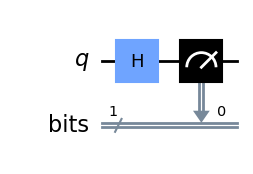

In [20]:
# Qubits
qr = QuantumRegister(size = 1, name = "q")
# Bits
cr = ClassicalRegister(size = 1, name = 'bits')
# Circuito Quântico
qc = QuantumCircuit(qr, cr)
# Gates
qc.h(qr)
#qc.z(qr[1])
# Medição
qc.measure(qr, cr)# measure_all
# Visualizando
qc.draw('mpl')

- Cada Qubit tem conectado a ele um fio. As operações nesse fio, afetarão somente o qubit conectado a ele.
- O resultado da medição em cada qubit só poderá retornar 0 ou 1.

``` Nota: No qiskit, os qubits são sempre inicializados no estado ``` $|0\rangle$

{'0': 523, '1': 477}


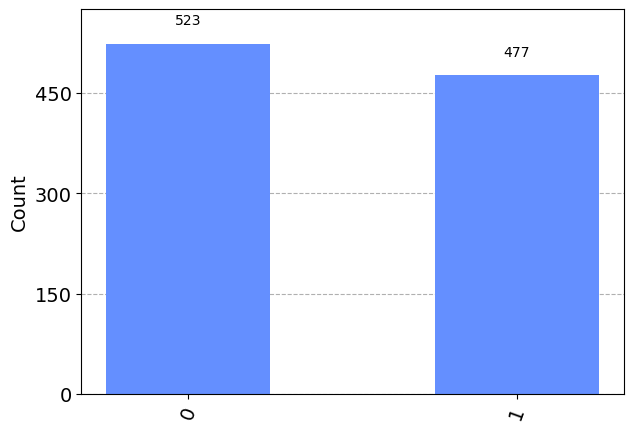

In [21]:
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

[Seções](#0)

# 2. Interferência <a id='2'></a>

---
## 2.1 Composição de Operadores <a id='21'></a>

O gate Hadamard $H$ é fudamental em computação quântica. Vamos analisar algumas propriedades importantes
\begin{equation*}
H = \frac{1}{\sqrt{2}}   
\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix}
\end{equation*}

e opera no estado $|0\rangle$ como 
\begin{equation*}
H|0\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle \equiv |+\rangle
\end{equation*}


já no estado $|1\rangle$ temos o seguinte

\begin{equation*}
H|1\rangle = \frac{1}{\sqrt{2}}|0\rangle - \frac{1}{\sqrt{2}}|1\rangle \equiv |-\rangle
\end{equation*}



No entanto, qual é o resultado da operação hadamard sobre os estados $|+\rangle$  e $|-\rangle$?
\begin{equation*}
   \Longrightarrow  H|+\rangle =  \frac{1}{\sqrt{2}}(H|0\rangle + H|1\rangle) = \frac{1}{\sqrt{2}}(|+\rangle + |-\rangle) = |0\rangle\\
\end{equation*} 

\begin{equation*}
    \Longrightarrow H|-\rangle = \frac{1}{\sqrt{2}}(H|0\rangle - H|1\rangle) = \frac{1}{\sqrt{2}}(|+\rangle - |-\rangle) = |1\rangle\\
\end{equation*} 

```Nota: Os estados``` $|+\rangle$ ```e``` $|-\rangle$ ```podem ser discriminados perfeitamente.```

[Seções](#0)

---
## 2.2 Mach-Zender Interferometer <a id='22'></a>

\begin{gather}
    |\psi_0\rangle = |0\rangle \notag\\
    \Longrightarrow |\psi_1\rangle = H|0\rangle = |+\rangle \notag\\
    \Longrightarrow |\psi_2\rangle = H|\psi_1\rangle = H|+\rangle = |0\rangle \notag
\end{gather} 

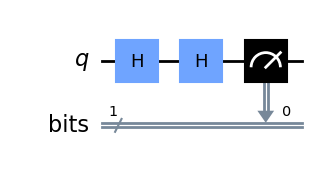

{'0': 1000}


In [22]:
n_qubits = 1
n_bits = 1
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.h(qr)
qc.measure(qr, cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
#plot_histogram(counts)

---

\begin{gather}
    |\psi_0\rangle = |0\rangle \notag\\
    \Longrightarrow |\psi_1\rangle = H|0\rangle = |+\rangle \notag\\
    \Longrightarrow |\psi_2\rangle = Z|\psi_1\rangle = \frac{1}{\sqrt{2}}(Z|0\rangle + Z|1\rangle) = |-\rangle \notag\\
    \Longrightarrow |\psi_3\rangle = H|\psi_2\rangle = H|-\rangle = |1\rangle \notag
\end{gather} 

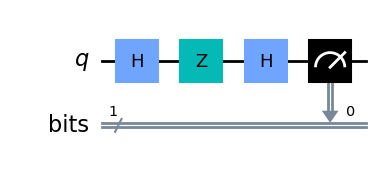

{'1': 1000}


In [23]:
n_qubits = 1
n_bits = 1
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.z(qr)
qc.h(qr)
qc.measure(qr, cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
#plot_histogram(counts)

[Seções](#0)

---

# 2.3 Principais Operadores <a id='23'></a>

1. Operadores de Pauli. Os operadores de Pauli são as seguintes:

\begin{equation*}

\mathbb{I} = 
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix},
\hspace{1mm}

X=
\begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix},
\hspace{1mm}

Y=
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix},
\hspace{1mm}

Z=
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
\end{equation*}

```Nota: Na mecânica quântica é comum as matrizes de Pauli aparecem com os símbolos``` $\sigma_x = X$, $\sigma_y = Y$, $\sigma_z = Z$

2. Operador Hadamard

\begin{equation*}
H =\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\end{equation*}

3. Operador Fase

\begin{equation*}
P_{\theta} =
\begin{bmatrix}
1 & 0 \\
0 & e^{i\theta}
\end{bmatrix}
\end{equation*}, 

onde $\theta$ é um número real

Casos particulares desse operador: 

\begin{equation*}
S = P_{\frac{\pi}{2}} =
\begin{bmatrix}
1 & 0 \\
0 & i
\end{bmatrix},

T = P_{\frac{\pi}{4}} =
\begin{bmatrix}
1 & 0 \\
0 & \frac{1+i}{\sqrt{2}}
\end{bmatrix},
\end{equation*}

e ainda $I = P_{0}, \hspace{5mm} Z = P_{\pi}$


4. Operadores de Rotação

\begin{equation*}
    R_{X}(\theta) = \cos\left(\frac{\theta}{2}\right) I -i \sin\left(\frac{\theta}{2}\right) X =
    \begin{bmatrix}
     \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\
     -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \\
     
    \end{bmatrix}
\end{equation*} 

\begin{equation*}
    R_{Y}(\theta) = \cos\left(\frac{\theta}{2}\right) I -i \sin\left(\frac{\theta}{2}\right) Y =
    \begin{bmatrix}
     \cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\
     \sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \\
     
    \end{bmatrix}
\end{equation*} 


\begin{equation*}
    R_{Z}(\theta) = \cos\left(\frac{\theta}{2}\right) I -i \sin\left(\frac{\theta}{2}\right) Z =
    \begin{bmatrix}
     e^{-i\frac{\theta}{2}} & 0 \\
     0 & e^{i\frac{\theta}{2}} \\
     
    \end{bmatrix}
\end{equation*} 


[Seções](#0)

---
# 2.4 Operador Oráculo <a id='24'></a>

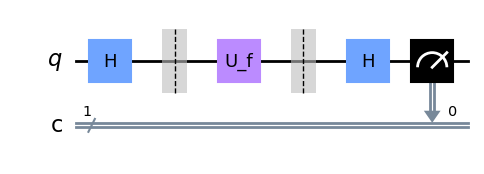

Imagine duas moedas, representadas por $x=0$ e $x=1$, que serão os inputs, e duas possibilidades de output (cara/coroa), representados por $f(x) = 0$ e $f(x)=1$

Temos 4 possibilidades:

1) $f(0) = 0, \hspace{5mm} f(1) = 0$ 

2) $f(0) = 0, \hspace{5mm} f(1) = 1$

3) $f(0) = 1, \hspace{5mm} f(1) = 0$

4) $f(0) = 1, \hspace{5mm} f(1) = 1$

Quando $f(0)=f(1)$ a função é dita ```constante``` e quando $f(0)\neq f(1)$ a função é ```balanceada```. No exemplo acima, os casos 1 e 4 representam funções ```constantes``` e os casos 2 e 3 representam funções ```balanceadas```.

Para cada um dos casos acima, queremos contruir um operador que satisfaça:
\begin{equation*}
U_f|0\rangle = (-1)^{f(0)}|0\rangle, \hspace{5mm} U_f|1\rangle = (-1)^{f(1)}|1\rangle
\end{equation*}


In [24]:
def oracle(case: int):
    Uf = QuantumCircuit(1)
    if case == 1:
        Uf.i(0)
    if case == 2:
        Uf.z(0)
    if case == 3:
        Uf.x(0)
        Uf.z(0)
        Uf.x(0)
    if case == 4:
        Uf.x(0)
        Uf.z(0)
        Uf.x(0)
        Uf.z(0)
    return Uf

[Seções](#0)

---
# 2.5 Algoritmo de Deutsch <a id='25'></a>
Construir um algorítmo que com apenas um shot consegue descobrir se a função implementada pelo operador oráculo $U_f|x\rangle = (-1)^{f(x)} |x\rangle$ é uma função ```constante``` ou ```balanceada```

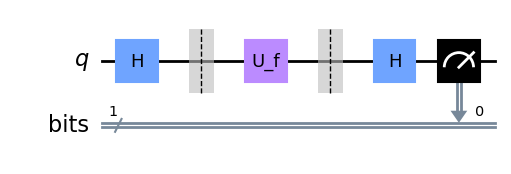

In [26]:
def circuit(function: QuantumCircuit):
    cr = ClassicalRegister(1, name = 'bits')
    qr = QuantumRegister(1, name = 'q')
    qc = QuantumCircuit(qr, cr)

    qc.h(qr)
    
    qc.barrier()
    qc.compose(function.to_gate(label = 'U_f'), inplace=True)
    qc.barrier()

    qc.h(qr)
    qc.measure(qr, cr)
    return qc

circuit(oracle(1)).draw('mpl')

In [49]:
# Escolhendo uma função aleatóriamente
f = np.random.randint(1,5)
print(f'A função f_{f} foi escolhida aleatoriamente')
# Construindo o operador Oráculo
U = oracle(f)
# Introduzindo o operador Oráculo no circuito
qc = circuit(U)
#display(qc.draw('mpl'))

A função f_4 foi escolhida aleatoriamente


In [50]:
# Fazendo a medição com apenas 1 shot
shot = 1
backend = AerSimulator()
#result = backend.run(circuits = qc, shots = shots).result()
result = execute(experiments = qc, backend = backend, shots = shot).result().get_counts()
if '0' in result:
    print('A função implementada é constante')
elif '1':
    print('A função implementada é balanceada')

A função implementada é constante


---
### Solução:


Primeiro aplicamos o operador Hadamard
\begin{equation*}
|\pi_0\rangle = H|0\rangle = |+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1 \rangle\right)
\end{equation*}

Depois aplicamos o operador Oráculo
\begin{equation*}
|\pi_1\rangle = U_f|\pi_0\rangle = \frac{1}{\sqrt{2}}\left[(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle\right]
\end{equation*}

Independente da função aplicada, teremos apenas duas possibilidades:

\begin{equation*}
\Longrightarrow  
|\pi_1\rangle = \frac{(-1)^{f(0)}}{\sqrt{2}}\left[|0\rangle + (-1)^{f(1)-f(0)}|1 \rangle\right]=
\left\{ \begin{array}{rcl}
(-1)^{f(0)}|+\rangle  & \text{para} & f(0) = f(1) \\
(-1)^{f(0)}|-\rangle  & \text{para} & f(0) \neq f(1) 
\end{array}\right.
\end{equation*}


```Nota: O fator multiplicativo ``` $(-1)^{f(0)}$ ```como vimos, não é relevante para a medição```

Aplicando Hadamard novamente, temos:

\begin{equation*}
\Longrightarrow |\pi_2\rangle = H|\pi_1\rangle = \left\{ \begin{array}{rcl}
(-1)^{f(0)}|0\rangle  & \text{para} & f(0) = f(1) \\
(-1)^{f(0)}|1\rangle  & \text{para} & f(0) \neq f(1) 
\end{array}\right.
\end{equation*}


```Nota: Essa é uma versão simplificada do algoritmo de Deutsch```


[Seções](#0)

# 3. Emaranhamento <a id='3'></a>

---
## 3.1 Sistemas Quânticos de 2 qubits <a id='31'></a>


Assim como na computação clássica, em computação quântica é essencial trabalhar em múltiplas unidades computacionais simulatâneamente para resolver tarefas complexas. Em sitemas de múltiplos qubits, a notação vetorial para os estados de qubits é definida usando o produto tensorial dos estados de qubits individuais. Para um sistema de 2 qubits, os estados da base são formados tomando o produto tensorial dos estados da base de qubits individuais. Aqui está uma definição geral para os estados de um sistema de 2 qubits 

Dado dois qubits $|q_1\rangle$ e $|q_0\rangle$ com os estados 
\begin{equation*}
    |q_0\rangle = 
    \begin{bmatrix}
        \alpha_0 \\
        \beta_0
    \end{bmatrix}, \hspace{5mm}
    |q_1\rangle = 
    \begin{bmatrix}
        \alpha_1 \\
        \beta_1
    \end{bmatrix}, \hspace{5mm}
\end{equation*}

\begin{equation*}
%|q_{n-1}q_{n-2}...q_{0}\rangle = |q_{n-1}\rangle \otimes |q_{n-%2}\rangle\otimes...\otimes |q_{0}\rangle     
\end{equation*}

o seu estado combinado em um istema de 2 qubits pode ser representado como

\begin{equation*}
|q_1q_0\rangle = |q_1\rangle \otimes |q_0\rangle = 
\begin{bmatrix}
\alpha_1 \\
\beta_1
\end{bmatrix}
\otimes
\begin{bmatrix}
\alpha_0 \\
\beta_0
\end{bmatrix}
=
\begin{bmatrix}
\alpha_1 \alpha_0 \\
\alpha_1 \beta_0\\
\beta_1 \alpha_0 \\
\beta_1 \beta_0
\end{bmatrix}
\end{equation*}


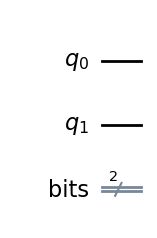

In [51]:
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.draw('mpl')

---
### Exemplo

Essa notação nos habilita a definir os estados da base para um sistema de 2 qubits como segue

\begin{equation*}
|00\rangle = |0\rangle \otimes |0\rangle =
%|00\rangle = |0\rangle_{2} =  |0\rangle^{\otimes2} =
\begin{bmatrix}
1\\
0
\end{bmatrix}
\otimes
\begin{bmatrix}
1\\
0
\end{bmatrix}
=
\begin{bmatrix}
1\\
0\\
0\\
0
\end{bmatrix}
\end{equation*}

\begin{equation*}
|01\rangle = |0\rangle \otimes |1\rangle =
%|00\rangle = |0\rangle_{2} =  |0\rangle^{\otimes2} =
\begin{bmatrix}
1\\
0
\end{bmatrix}
\otimes
\begin{bmatrix}
0\\
1
\end{bmatrix}
=
\begin{bmatrix}
0\\
1\\
0\\
0
\end{bmatrix}
\end{equation*}

\begin{equation*}
|10\rangle = |1\rangle \otimes |0\rangle =
%|00\rangle = |0\rangle_{2} =  |0\rangle^{\otimes2} =
\begin{bmatrix}
0\\
1
\end{bmatrix}
\otimes
\begin{bmatrix}
1\\
0
\end{bmatrix}
=
\begin{bmatrix}
0\\
0\\
1\\
0
\end{bmatrix}
\end{equation*}


\begin{equation*}
|11\rangle = |1\rangle \otimes |1\rangle =
%|00\rangle = |0\rangle_{2} =  |0\rangle^{\otimes2} =
\begin{bmatrix}
0\\
1
\end{bmatrix}
\otimes
\begin{bmatrix}
0\\
1
\end{bmatrix}
=
\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}
\end{equation*}



Um estado arbitrário $|\psi\rangle$ num espaço de 4 dimensões pode ser escrito como uma combinação linear dos estados da base

\begin{equation*}
 |\psi\rangle = |q_1\rangle \otimes |q_0\rangle = |q_1q_0\rangle =
\begin{bmatrix}
\alpha\\
\beta\\
\gamma\\
\delta
\end{bmatrix}
= 
\alpha|00\rangle + \beta|01\rangle + \gamma|10\rangle + \delta|11\rangle
\end{equation*}


[Seções](#0)

---
# 3.2 Produto tensorial de operadores <a id='32'></a>

\begin{equation*}
A \otimes B =
\begin{bmatrix}
a_{00} & a_{01}\\
a_{10} & a_{11}
\end{bmatrix}
\otimes
\begin{bmatrix}
b_{00} & b_{01}\\
b_{10} & b_{11}
\end{bmatrix}
=
\begin{bmatrix}
a_{00}b_{00} & a_{00}b_{01} & a_{01}b_{00} & a_{01}b_{01}\\
a_{00}b_{10} & a_{00}b_{11} & a_{01}b_{10} & a_{01}b_{11}\\
a_{10}b_{00} & a_{10}b_{01} & a_{11}b_{00} & a_{11}b_{01}\\
a_{10}b_{10} & a_{10}b_{11} & a_{11}b_{10} & a_{11}b_{11}\\
\end{bmatrix}
\end{equation*}


\begin{equation*}
(A \otimes B) |q_1q_0\rangle = (A \otimes B) |q_1\rangle \otimes |q_0\rangle = A|q_1\rangle \otimes B|q_0\rangle 
\end{equation*}

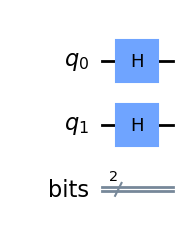

In [52]:
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.draw('mpl')

---
### Exemplo

\begin{equation*}
(H\otimes H) |00\rangle = H|0\rangle \otimes H|0\rangle = |+\rangle \otimes |+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\otimes\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
= \frac{1}{2}|00\rangle + \frac{1}{2}|01\rangle + \frac{1}{2}|10\rangle + \frac{1}{2}|11\rangle
\end{equation*}

```Exercício: Mostrar que o anterior é equivalente a calcular primeiro``` $H \otimes H$ ```e aplicar sobre o estado``` $|00\rangle$

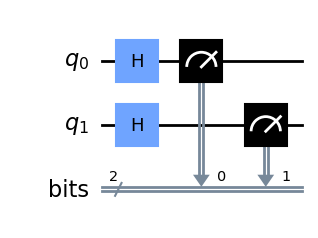

{'11': 257, '10': 244, '00': 242, '01': 257}


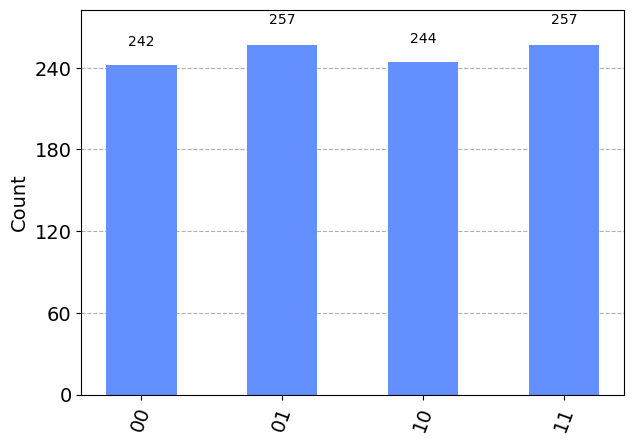

In [53]:
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.measure(qr,cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

[Seções](#0)


---
# 3.3 CNOT <a id='33'></a>

Uma porta fundamental de 2 qubits é a porta controlada NOT (CNOT). Basicamente, ela opera sobre dois qubits, um qubit controle (control) e um qubit alvo (target), e aplica uma operação NOT( ou X) no qubit target se o qubit control está no estado $|1\rangle$ mas deixa ele inalterado caso contrário. Esta extensão da porta lógica NOT pode ser extendida para mais qubits controles. 

Dado o estado $|q_1q_0\rangle$ a forma do operador CNOT para o caso em que o $q_1$ é o qubit controle e $q_0$ é o qubit alvo, é a seguinte: 
\begin{equation*}
    CNOT = 
    \begin{bmatrix}
     1 & 0 & 0 & 0 \\
     0 & 1 & 0 & 0 \\
     0 & 0 & 0 & 1 \\
     0 & 0 & 1 & 0 
    \end{bmatrix}
\end{equation*} 

\begin{equation*}
    CNOT|00\rangle = |00\rangle
\end{equation*}

\begin{equation*}
    CNOT|01\rangle = |01\rangle
\end{equation*}

\begin{equation*}
    CNOT|10\rangle = |11\rangle
\end{equation*}

\begin{equation*}
    CNOT|11\rangle = |10\rangle
\end{equation*}

```Exercício: Qual é a forma do operador CNOT quando ``` $q_0$ ```é o controle e``` $q_1$ ```é o alvo?```

```Nota:Qualquer multi-qubit gate pode ser decomposto em uma sequência de portas single-qubits e CNOT gates (universalidade do CNOT gate).``` 


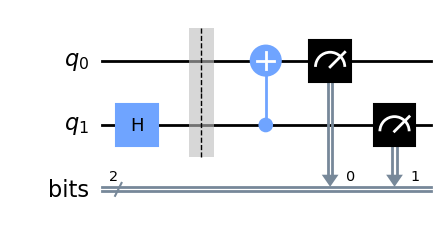

{'00': 490, '11': 510}


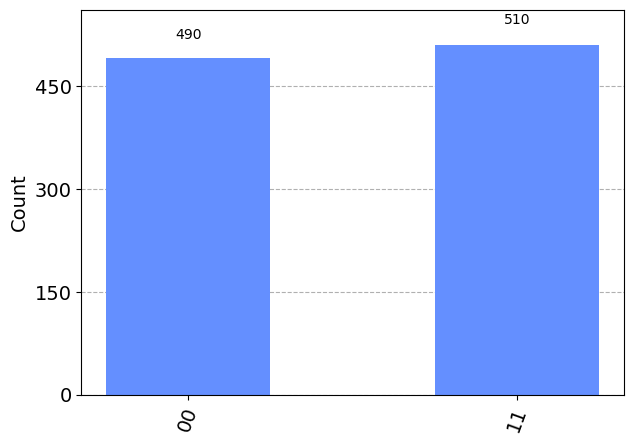

In [54]:
n_qubits = 2
n_bits = 2
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.h(qr[1])
qc.barrier()
qc.cx(qr[1], qr[0])
qc.measure(qr,cr)
display(qc.draw('mpl'))
shots = 1_000
backend = AerSimulator()
result = backend.run(circuits = qc, shots = shots).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

Exemplo

\begin{equation*}
\left(H \otimes \mathbb{I}\right) |q_1q_0\rangle = \left(H \otimes \mathbb{I}\right) |00\rangle = |+\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)\\
\end{equation*}


\begin{equation*}
\Longrightarrow CNOT\left(H \otimes \mathbb{I}\right) |q_1q_0\rangle = \frac{1}{\sqrt{2}}(CNOT|00\rangle + CNOT|10\rangle) = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle 
\end{equation*}

```Nota: Para 3 ou mais qubits o procedimento de generalização é o mesmo```

[Seções](#0)

# 4. Adendo <a id='4'></a>

# Notação Bra-Ket
---
## Ket

Um "Ket" é um vetor coluna. Qualquer vetor coluna com elementos $a_1, a_2,..., a_n$ pode ser escrito como

\begin{equation*}
|a\rangle = 
\begin{bmatrix}
a_1\\
a_2\\
\vdots\\
a_n
\end{bmatrix}
\end{equation*}

---

## Bra

Um "Bra" é um vetor linha. De um ponto de vista mais técnico, "Bra" é o conjugados hermitiano, representados pelo símbolo de uma adaga $\dag$, de seu "Ket" correspondente, ou seja:

\begin{equation*}
\langle a| = |a\rangle^{\dag} =  
\begin{bmatrix}
a_1\\
a_2\\
\vdots\\
a_n
\end{bmatrix}
^{\dag}
=
\begin{bmatrix}
a_1^{*} & a_2^{*} & ... & a_n^{*}
\end{bmatrix}
\end{equation*}


```
Nota: O conjugado hermitiano de uma matriz é obtido pegando o transposto da matriz (isto é, trocar linhas por coluna e colunas por linhas) e o complexo conjugado de cada um de seus elementos
```

```
Nota: O Complexo conjugado de um número complexo, pode ser obtido trocando o sinal da parte imaginária do número complexo
```



---
# Vetores representando estados quânticos

Usaremos a notação de Dirac (Bra-Ket) para representar os qubits, que é a notação padrão em mecânica quântica.    


Os estados "0" e "1" dos qubits são representados como vetores colunas

\begin{equation*}  
|0\rangle = 
\begin{bmatrix}
1\\
0\\
\end{bmatrix},
\hspace{5mm} |1\rangle = 
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
\end{equation*}  

Como vimos, cada um dos "Kets" tem a sua representação como "Bras", nesse caso:

\begin{equation*}  
\langle 0| = 
\begin{bmatrix}
1 & 0
\end{bmatrix},
\hspace{5mm} 
|1\rangle = 
\begin{bmatrix}
0 & 1
\end{bmatrix}
\end{equation*}

Esses vetores são conhecidos como vetores da base, pois qualquer outro estado (vetor coluna) num espaço de duas dimensões pode ser escrito como uma combinação linear desses vetores

### Representando um estado quântico arbitrário




\begin{equation*}  
|\psi\rangle = 
\begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix}
= \alpha
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
+
\beta
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
= \alpha|0\rangle + \beta|1\rangle, \hspace{5mm} \alpha, \beta \in \mathbb{C}
\end{equation*}  

Aqui, $\alpha$ e $\beta$ são números complexos. Os vetores da base $|0\rangle$ e $|1\rangle$ geram um espaço vetorial complexo de 2 dimensões, 
```
Nota: Nesse caso, dizemos que o qubit está em um estado de "superposição" ou ainda, em um estado de combinação linear dos vetores da base.
```

---
# Produto interno

O produto interno é definido como sendo a multiplicação entre um Bra (um vetor linha) e um Ket (um vetor coluna). O resultado de um produto interno é um número complexo.

O produto interno dos estados

\begin{equation*}
|a\rangle = 
\begin{bmatrix}
a_1\\
a_2\\
\vdots\\
a_n
\end{bmatrix}
,
\hspace{5mm} e \hspace{5mm}
|b\rangle = 
\begin{bmatrix}
b_1\\
b_2\\
\vdots\\
b_n
\end{bmatrix}
\end{equation*}

é dado por

\begin{equation*}
\langle a|b\rangle = 
\begin{bmatrix}
a_1^{*} & a_2^{*} & \dots & a_n^{*}
\end{bmatrix}
\begin{bmatrix}
b_1\\
b_2\\
\vdots\\
b_n
\end{bmatrix}
=a_1^{*}b_1 + a_2^{*}b_2 +\dots + a_n^{*}b_n
\end{equation*}

---
### Exemplo

\begin{equation*}
\langle 0| 0\rangle = 
\begin{bmatrix}
1 & 0 \\    
\end{bmatrix}
\begin{bmatrix}
1\\
0\\    
\end{bmatrix}
= 1
\end{equation*}

\begin{equation*}
\langle 1| 1\rangle = 
\begin{bmatrix}
0 & 1 \\    
\end{bmatrix}
\begin{bmatrix}
0\\
1\\    
\end{bmatrix}
= 1
\end{equation*}

```
Nota: Quando o produto interno de um vetor com ele mesmo é igual a 1, dizemos que o vetor é normalizado
```

\begin{equation*}
\langle 0| 1\rangle = 
\begin{bmatrix}
1 & 0 \\    
\end{bmatrix}
\begin{bmatrix}
0\\
1\\    
\end{bmatrix}
= 0
\end{equation*}

\begin{equation*}
\langle 1| 0\rangle = 
\begin{bmatrix}
0 & 1 \\    
\end{bmatrix}
\begin{bmatrix}
1\\
0\\    
\end{bmatrix}
= 0
\end{equation*}


```
Nota: Quando o produto interno de dois vetores pe igual a 0, dizemos que os vetores são ortogonais
```

Resumidamente,

\begin{equation*}
\langle i|j\rangle = \delta_{ij} =
\left\{ \begin{array}{rcl} 
1 & \text{,} \hspace{5mm} i=j \\
0 & \text{,} \hspace{5mm} i \neq j \\
\end{array}\right.
\end{equation*}

onde $\delta_{ij}$ é o delta de Kronecker

---
# Produto Externo

O produto externo é definido como a multiplicação de um Ket (vetor coluna) e um Bra (um vetor linha). O resultado de um produto externo é uma matriz ou ainda, operadores.


O produto externo dos estados

\begin{equation*}
|a\rangle = 
\begin{bmatrix}
a_1\\
a_2\\
\vdots\\
a_n
\end{bmatrix}
,
\hspace{5mm} e \hspace{5mm}
|b\rangle = 
\begin{bmatrix}
b_1\\
b_2\\
\vdots\\
b_n
\end{bmatrix}
\end{equation*}

é dado por

\begin{equation*}
|a\rangle \langle b| = 
\begin{bmatrix}
a_1\\
a_2\\
\vdots\\
a_n
\end{bmatrix}
\begin{bmatrix}
b_1^{*} & b_2^{*} & \dots & b_n^{*}
\end{bmatrix}
=
\begin{bmatrix}
a_1b_1^{*} & a_1b_2^{*} & \dots & a_1b_n^{*}\\
a_2b_1^{*} & a_2b_2^{*} & \dots & a_2b_n^{*}\\
\vdots \\
a_nb_1^{*} & a_nb_2^{*} & \dots & a_nb_n^{*}

\end{bmatrix}
\end{equation*}

---
### Exemplo


\begin{equation*}
|0\rangle \langle 0| = 
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
|0\rangle \langle 1| = 
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
\begin{bmatrix}
0 & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
|1\rangle \langle 0| = 
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 \\
1 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
|1\rangle \langle 1| = 
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
\begin{bmatrix}
0 & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
0 & 0 \\
0 & 1 \\
\end{bmatrix}
\end{equation*}

```
Nota: A matriz identidade em duas dimensões pode ser escrita como:
```

\begin{equation*}
\mathbb{I} = 
|0\rangle \langle 0|+|1\rangle \langle 1| = 
\begin{bmatrix}
1 & 0\\
0 & 1\\
\end{bmatrix}
\end{equation*}
```
Nota: Veja que o resultado de um produto interno é um escalar e o resultado de um produto externo é uma matriz.
```

---
# Produto interno de um estado arbitrário

Para um estado quântico arbitrário $|\psi\rangle$ temos 

\begin{equation*}  
|\psi\rangle = 
\begin{bmatrix}
\alpha\\
\beta\\
\end{bmatrix}
= \alpha|0\rangle + \beta|1\rangle
\end{equation*}   

o correspondente "bra" é dado por
\begin{equation*}  
\langle\psi| = 
\begin{bmatrix}
\alpha^{*} & \beta^{*}
\end{bmatrix}
= \alpha^{*} \langle 0| + \beta^{*} \langle 1| 
\end{equation*}   

onde $ \alpha^{*} $ e $\beta^{*}$ são os complexos conjugados de $\alpha$ e $\beta$ respectivamente.

Dessa forma, usando a propriedade de ortonormalidade dos vetores da base, temos que o produto interno $\langle \psi|\psi\rangle$ é dado por

\begin{equation*}  
\langle\psi|\psi\rangle = |\alpha|^2 + |\beta|^2 \geq 0
\end{equation*}  


```
Nota: Tecnicamente, a raíz quadrada do produto interno é chamada de norma Euclidiana.
```

\begin{equation*}
||\hspace{0.5mm}|\psi\rangle \hspace{0.5mm}|| = \sqrt{\langle\psi|\psi\rangle} = \sqrt{|\alpha|^2 + |\beta|^2}
\end{equation*}


```
Nota: A classe StateVector inclui um método chamado "is_valid" que verifica se um dado vetor é um estado quântico válido (i.e, se ele tem norma euclidiana igual a 1)
```

---
# Normalizando um vetor
```
Nota: Caso queira normalizar um vetor, basta multiplicá-lo pelo inverso da norma euclidiana deste vetor
```

\begin{equation*}
|\psi_{norm}\rangle = \frac{1}{||\hspace{0.5mm}|\psi\rangle \hspace{0.5mm}||}|\psi\rangle \hspace{5mm}  \Longrightarrow   \langle \psi_{norm} |\psi_{norm}\rangle = \frac{1}{||\hspace{0.5mm}|\psi\rangle \hspace{0.5mm}||^2}\langle\psi|\psi\rangle = 1 
\end{equation*}


---
# Medindo Estados Quânticos

Dado um estado quântico $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ em está em superposição. Quando medimos esse estado uma vez podemos obter os estados clássicos "0" ou "1". Realizando uma série de medições, encontraremos o estado "0" com determinada probabilidade, digamos "p" e encontraremos o eso estado "1" com probabilidade "1-p". Na mecânica quântica existe uma regra que nos diz com que probabilidade mediremos o estado "0" e o estado "1", essa regra é conhecida como Regra de Born

---
### Regra de Born

Ao medir o estado $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, a probabilidade de encontrarmos $|\psi\rangle$ no estado $|0\rangle$ é dada por
\begin{equation*}
Pr(0) = |\langle 0|\psi\rangle|^2 = |\alpha|^2
\end{equation*}

e a probabilidade de encontrarmos $|\psi\rangle$ no estado $|1\rangle$ é dada por

\begin{equation*}
Pr(1) = |\langle 1|\psi\rangle|^2 = |\beta|^2
\end{equation*}

E dado que $Pr(|0\rangle) + Pr(|1\rangle) = 1$ devemos ter $|\alpha|^2 + |\beta|^2 = 1$

---
### Exemplo

Medindo o estado 
\begin{equation*}
|+\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle
\end{equation*}
A probabilidade de obter "0" é dada por

\begin{equation*}
Pr(0) = |\langle 0|+\rangle|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}
\end{equation*}

A probabilidade de obter "1" é dada por

\begin{equation*}
Pr(1) = |\langle 1|+\rangle|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}
\end{equation*}


---
```Nota: Fases globais são fisicamente irrelevantes```


\begin{equation*}
|\bar\psi\rangle = e^{i\phi}|\psi\rangle = e^{i\phi}(\alpha|0\rangle + \beta|1\rangle), \hspace{5mm} \phi \in \mathbb{R}
\end{equation*}


\begin{equation*}
\Longrightarrow \langle\bar\psi|\bar\psi\rangle = \langle\psi|\psi\rangle
\end{equation*}


\begin{equation*}
\Longrightarrow |\langle 0|\bar\psi\rangle|^2 = |e^{i\phi}\alpha|^2 = |\alpha|^2 = |\langle0|\psi\rangle|^2, \hspace{5mm} |\langle 1|\bar\psi\rangle|^2 = |e^{i\phi}\beta|^2 = |\beta|^2 = |\langle1|\psi\rangle|^2,
\end{equation*}



---
# Operadores Unitários

Uma matriz quadrada $U$ tendo elementos complexos é unitária se satisfaz as igualdades abaixo

\begin{equation*}
UU^{\dag} = U^{\dag}U = \mathbb{I}\\
\end{equation*}


lembrando que $U^{\dag} = \bar U^{T}$, ou seja o conjugado hermitiano de uma matriz é obtido pegando a transposta da matriz e o complexo conjugado dos seus elementos. Essas duas igualdades são equivalentes a $$ U^{\dag} = U^{-1}$$

```Nota: Operadores Unitários preservam a norma do estado quântico```

\begin{equation*}
|\bar \psi\rangle = U|\psi\rangle \hspace{5mm} \Longrightarrow \hspace{5mm} \langle\bar\psi| = \langle\psi| U^{\dag} \hspace{5mm} \Longrightarrow \hspace{5mm} \langle\bar \psi|\bar\psi\rangle = \langle\psi|\psi\rangle \hspace{5mm} \Longrightarrow \hspace{5mm} || U|\psi\rangle || = ||\hspace{0.5mm}|\psi\rangle \hspace{0.5mm}||
\end{equation*}

onde usei o fato que $(AB)^{\dag} = B^{\dag}A^{\dag}$


---
## 4.1 Esfera de Bloch <a id='41'></a>

Dada a relação $|\alpha|^2+|\beta|^2 = 1$ entre as amplitudes, é possível escrever o estado $|\psi\rangle$ de um único qubit como
\begin{equation*}
|\psi\rangle = \alpha|0\rangle+\beta|1\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\varphi}\sin\left(\frac{\theta}{2}\right)|1\rangle, \hspace{5mm} \theta,\varphi \in \mathbb{R}
\end{equation*}

Os números $\theta$ e $\varphi$ definem um ponto na esfera tridimensional unitária. Essa esfera é tradicionalmente chamada de esfera de Bloch. Ela provê meios úteis de visualizar o estado de um único qubit.

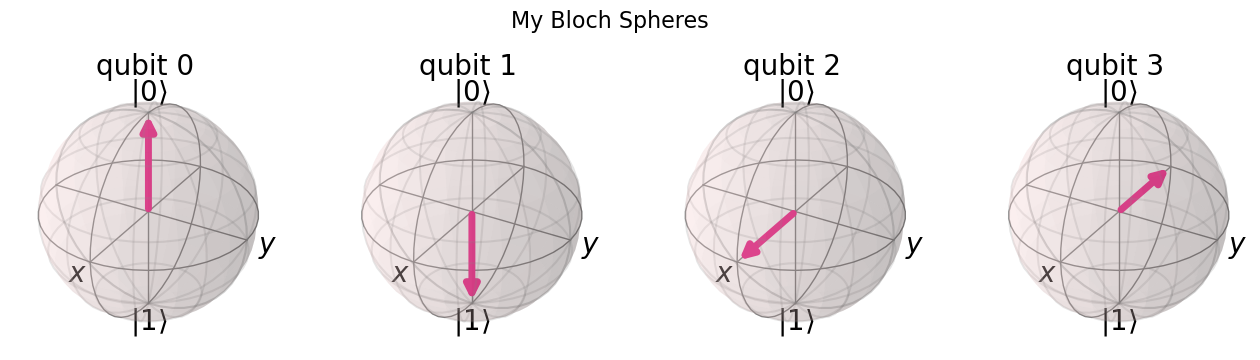

In [33]:
n_qubits = 4
n_bits = 4
qr = QuantumRegister(size = n_qubits, name = 'q')
cr = ClassicalRegister(size = n_bits, name = 'bits')
qc = QuantumCircuit(qr, cr)
qc.x(qr[1])
qc.h(qr[2])
qc.x(qr[3])
qc.h(qr[3])
#qc.measure(qr,cr)
#display(qc.draw('mpl'))
from qiskit.quantum_info import DensityMatrix
matrix = DensityMatrix(qc)
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(matrix, title='My Bloch Spheres', reverse_bits=False)

[Seções](#0)

# Referências
- IBM Quantum Learning 
https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information
- Dissertação José Victor. 
https://sappg.ufes.br/tese_drupal/tese_15877_Disserta%E7%E3o%20final%20Jos%E9%20Victor%20S.%20Scursulim%20-%20PPGFis.pdf
- Wong, Thomas G. Introduction to Classical and Quantum Computing (https://www.thomaswong.net/) link para o pdf no próprio site.

[Seções](#0)